In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The objectives of this case study are as follows:

1 Predict flood given related features

2 Identify important features that influence flood

3 Relational strength between flood  and other features present in the data set

In order to meet above mentioned objectives using machine learning, a machine learning pipeline that includes key steps  is followed. These key steps are:

1. Understanding the data

     - distribution of features
     - features types
2. Data pre-processing

     - handling missing values(if present in the data set)
     - Scaling (if features are of variant scales)
     - handling categorical features( if present in the data set then converting them to suitable numerical 
       values using Encoder in Sklearn)
3. Identifying Machine learning technique 

     - Classification( if predictive feature is categorical)
     - Regression (if predictive feature is numerical)
4. Selecting right supervised technique for a given problem

    - preparing suit of supervised techniques selected in step 3 ( suit is prepared for the reason that we may not know in advance which algorithm will perform better)  

    - selecting the technique with best accuracy score on k- cross validation  
Hyperparamter optimization of selected supervised technique in step 4

5. Using the selected model for predictive task using appropriate metrices

6. Interpret the results

7. From the selected supervised technique, mine important features for the target class (to address objective 2)

8. Visualization of correlation plot to know relational strength between target feature with other features in the data set

9. Understanding relational between gender and total_UPDRS score

Below we walk through steps 1-10 mentioned above of the machine learning process using python to meet the objectives given for this case study.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import tree
import seaborn as sns
color = sns.color_palette()


In [ ]:
# Loading data set in pandas dataframe
RF_dataset = pd.read_csv('drive/MyDrive//Colab Notebooks/kerala.csv')

# 1. Understanding Dataset

### 1.1 Understanding data types of features present in the data set


In [ ]:
# getting basic information of data set such as, number of features, number of observations, data types and name of features
RF_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

The data set has 118 observations and 16 features( including class label). All features except FLOOD are numerical in nature. The feature FLOOD in this data set is class variabe. 

### 1.2 Deleting unwanted features

In [ ]:
# deleting unwanted features from data set namely, SUBDIVISION and YEAR as they will not contribute in analysis
RF_dataset.drop(['SUBDIVISION', 'YEAR'], axis=1, inplace= True)


### 1.3 Inspecting Distribution of Features

In [ ]:
RF_dataset.hist( figsize=(15, 15))
plt.show()

The result reveals that all features have different scale. Hence scaling them before applying machine learning models is important to get unbiased results.

# 2. Data preprocessing

### 2.1 Changing object data type to integer

In [ ]:
# changing data type of FLOOD from object to integer as sklearn does not support object data type for a class feature.
RF_dataset['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
RF_dataset["FLOODS"].value_counts()

1    60
0    58
Name: FLOODS, dtype: int64

the ouput of the cell represents that data type of the feature now  is int64 containing two classes namely, 1 and 0. It indicates that it is binary classfication problem. The number of observations belogning to class 1 is 60 and 58 samples belongs to class 0.

### 1.3 Checking on null values present in the data set

In [ ]:
# checking null values if present in the data set
RF_dataset.isnull().sum()

JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

there is no null value present in the data set

### 1.4 Creating separate data for dependent feature and a set of independent features present in the data set.
 

In [ ]:
# dividing the data in two parts
X_independent = RF_dataset.iloc[:,0:13]
y_dependent = RF_dataset.iloc[:, -1]


### 1.5 Scaling feature values using min-max scaler



# 3. Identification of suitable Machine learning technique for given problem

based on the data set and objectives of the problem defined, it is clear that it is a classfication problem. Where objective is to predict feature FLOOD based on other features present in the data set. Below is the list of supervised techniuqes that can be used to meet project objectives. 

1.   Naive bayes
2.   k nearest neighbour
3.   Decision tree
4.   Support vector Machines
5.   Logistic regression



# 4. Finding the best supervised technique for given problem

### 4.1 creating training and testing data sets for machine learning models


In [ ]:
# creating train test split. 
seed =7
X_train, X_test, y_train, y_test = train_test_split(X_independent, y_dependent, test_size = 0.2, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (94, 13)
X_test (24, 13)
y_train (94,)
y_test (24,)


The 80% dataset in pair (X_train, y_train) will be used for training purpose whereas, the set (X_test, y_test) for testing model performance. 

### 4.2 Creating pipeline for supervised learning models
Python sklearn supports automatic standard workflow in applied machine learning. The pipeline clearly defines data preparation methods for machine learning models without leaking data from training to test data set. Which in thus provides a robust learning enviornment for models. 

In [ ]:
# creating pipeline of five supervised machine learning models where model is trained after the data set is standardized.
Pipeline_Models = []
Pipeline_Models.append(('scaledNB', Pipeline([('Scaler', StandardScaler()),
                                             ('NBmodel', GaussianNB()
                                             )])))
Pipeline_Models.append(('scaledKNN', Pipeline([('Scaler', StandardScaler()),
                                             ('KNNmodel', KNeighborsClassifier()
                                             )])))

Pipeline_Models.append(('scaledDT', Pipeline([('Scaler', StandardScaler()),
                                             ('DTmodel', DecisionTreeClassifier()
                                             )]))) 
Pipeline_Models.append(('scaledSVC', Pipeline([('Scaler', StandardScaler()),
                                             ('SVCmodel', SVC()
                                             )])))


Pipeline_Models.append(('scaledLR', Pipeline([('Scaler', StandardScaler()),
                                             ('LRmodel', LogisticRegression()
                                             )])))








### 4.3 Comparing Supervised algorithms

It is very difficult to pick one from a pool of several models for a given problem. So the best practice is to prepare suits of models and compare their performances on a given data set. The resampling method namely, cross validation provides an estimate on how accurate each model may be on unseen data. We can also use visualize the results for comparing performances. 


In [ ]:
# applying 10 cross validation for each model in pipeline created above
Model_Eval_Score =[]
Name_of_model =[]
# applying cross validation on each algorithm in suit
for name, model_detail in Pipeline_Models:
    # intiating cross validation  10 times
    kfold = KFold(n_splits=10)
     # applying cross validation with 10 iterations on the training data with performance mesure set to "accuracy"
    CV_Results = cross_val_score(model_detail, X_train, y_train, cv=kfold, scoring='accuracy')
    # adding result of each iteration in list
    Model_Eval_Score.append(CV_Results)
    # name of the corresponding algorithm is stored as follows
    Name_of_model.append(name)
   

In [ ]:
seed =7
CV_IterationsBy_model = pd.DataFrame(Model_Eval_Score,index=['NB','KNN', 'DT', 'SVC','LR'] )

# taking  transpose of the data frame so that each column is a unique model
Table_Results_CV= pd.DataFrame(CV_IterationsBy_model.T)
print("The 10 cross validation results of each classification algoritm are: \n")
print(Table_Results_CV)
print("The mean performance  and standard deviation of each classification algorithm are: \n")
table_mean_std = pd.DataFrame(list(zip(Table_Results_CV.mean(), Table_Results_CV.std())), columns =['mean', 'std'], index = ['NB','KNN','DT','SVC','LR'])
print(table_mean_std)


The 10 cross validation results of each classification algoritm are: 

         NB       KNN   DT       SVC        LR
0  1.000000  0.800000  1.0  1.000000  1.000000
1  1.000000  0.900000  1.0  1.000000  1.000000
2  1.000000  0.800000  1.0  0.900000  1.000000
3  0.600000  0.900000  1.0  0.800000  0.900000
4  1.000000  0.888889  1.0  1.000000  1.000000
5  1.000000  0.777778  1.0  0.888889  0.888889
6  1.000000  1.000000  1.0  1.000000  1.000000
7  0.888889  0.888889  1.0  1.000000  1.000000
8  0.666667  0.666667  1.0  0.666667  0.888889
9  1.000000  0.888889  1.0  1.000000  1.000000
The mean performance  and standard deviation of each classification algorithm are: 

         mean       std
NB   0.915556  0.153532
KNN  0.851111  0.091804
DT   1.000000  0.000000
SVC  0.925556  0.114522
LR   0.967778  0.051971


In [ ]:
seed =7
scaler= StandardScaler().fit(X_train)
X_rescaled_train= scaler.transform(X_train)
X_rescaled_test= scaler.transform(X_test)


In [ ]:
seed =7
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
model_DT = DecisionTreeClassifier()
grid_search_DT = GridSearchCV(estimator=model_DT, param_grid=param_grid, cv=5, verbose=True)
grid_search_DT.fit(X_rescaled_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
print(grid_search_DT.best_params_)


{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


In [ ]:
final_DT_model = DecisionTreeClassifier(ccp_alpha = 0.01, criterion ='gini' , max_depth= 8, max_features= 'log2')
final_DT_model.fit(X_rescaled_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=8, max_features='log2')

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.79      1.00      0.88        11

    accuracy                           0.88        24
   macro avg       0.89      0.88      0.87        24
weighted avg       0.90      0.88      0.87        24



<Figure size 300x300 with 0 Axes>

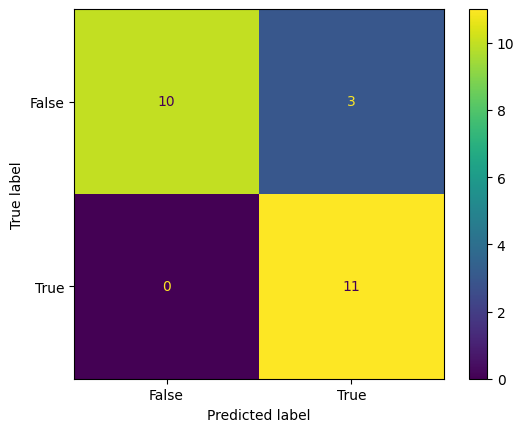

In [ ]:
y_predicted_DT = final_DT_model.predict(X_rescaled_test)
model_performance = metrics.confusion_matrix(y_test, y_predicted_DT)
model_report =metrics.classification_report(y_test, y_predicted_DT)
print(model_report)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = model_performance , display_labels = [False, True])
plt.figure(figsize=(3,3))
cm_display.plot()
plt.show()

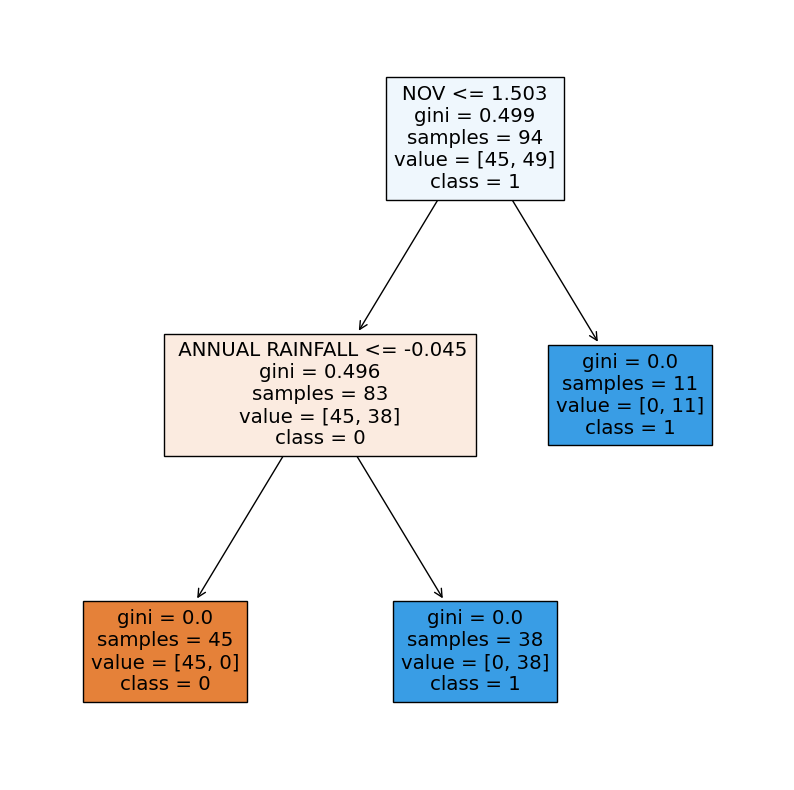

In [ ]:
col_name = RF_dataset.columns
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(final_DT_model,feature_names =RF_dataset.columns[0:13],class_names =["0","1"], filled=True)

In [ ]:
print(final_DT_model.feature_importances_)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.12171134 0.
 0.87828866]


<Axes: >

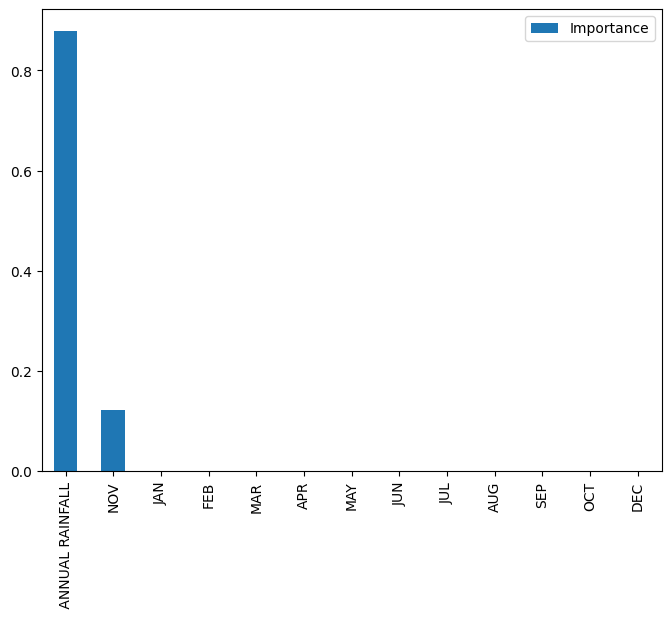

In [ ]:
feat_importances_DT = pd.DataFrame(final_DT_model.feature_importances_, index=RF_dataset.columns[0:13], columns=["Importance"])
feat_importances_DT.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_DT.plot(kind='bar', figsize=(8,6))